## Emerging Technologies Project 2020
***
#### Trained Model

1. This notebook should train a model to predict power output from wind speed.


In [1]:
# Data Frame
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# Machine learning
import keras as kr

In [2]:
# Adapted from: https://keras.io/examples/vision/mnist_convnet/
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### From video 'Neuron in Keras'

In [3]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [4]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [5]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a two neurons in a single layer.
m.add(kr.layers.Dense(2, input_dim=1, activation="linear"))

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(1, activation="linear", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))



# Set the weight/bias of the two neurons.
m.layers[0].set_weights([np.matrix([2.0, 3.0]), np.array([-5.0, -3.0])])

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [6]:
# Create some input values.
x = np.arange(-10.0, 10.1, 1.0)

# Run each x value through the neural network.
y = m.predict(x)

In [7]:
# Look at the outputs.
y

array([[-58.],
       [-53.],
       [-48.],
       [-43.],
       [-38.],
       [-33.],
       [-28.],
       [-23.],
       [-18.],
       [-13.],
       [ -8.],
       [ -3.],
       [  2.],
       [  7.],
       [ 12.],
       [ 17.],
       [ 22.],
       [ 27.],
       [ 32.],
       [ 37.],
       [ 42.]], dtype=float32)

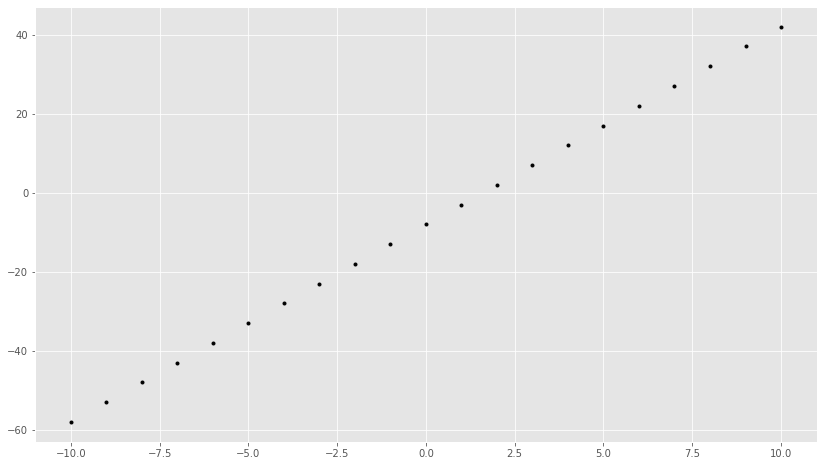

In [8]:

# Plot the values.
plt.plot(x, y, 'k.');

In [9]:
# Calculating the output using numpy arrays.
neuron1 =  2.0 * x - 5.0
neuron2 =  3.0 * x - 3.0
neuron3 = neuron1 + neuron2
neuron3

array([-58., -53., -48., -43., -38., -33., -28., -23., -18., -13.,  -8.,
        -3.,   2.,   7.,  12.,  17.,  22.,  27.,  32.,  37.,  42.])

#### With sigmoid

In [10]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0, with sigmoid activation.
m.add(kr.layers.Dense(1, input_dim=1, activation="sigmoid", kernel_initializer=kr.initializers.Constant(value=1.0), bias_initializer=kr.initializers.Constant(value=0.0)))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [11]:
# Create some input values.
x = np.arange(-10.0, 10.1, 1.0)

# Run each x value through the neural network.
y = m.predict(x)

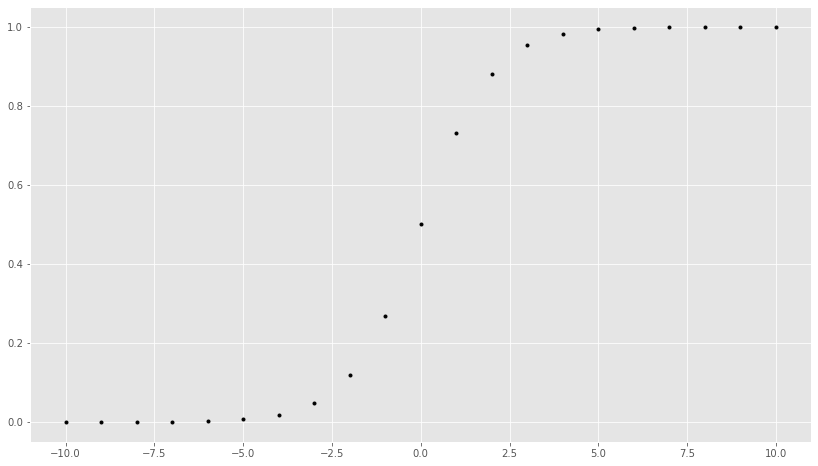

In [12]:
# Plot the values.
plt.plot(x, y, 'k.');


#### From video 'Linear regression in Keras'

In [20]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]


In [21]:
# Simple linear equation.
f = lambda x: 3.0 * x + 1.0

In [23]:
# Create a training data frame with x and y values.
# The x values are randomly selected between 0 and 100.
# y_i is f(x_i)
train = pd.read_csv("./misc/powerproduction.csv")
train['x'] = np.random.uniform(0.0, 100.0, 500)
train['y'] = f(train['x'])
train

,speed,power,x,y
0,0.000,0.0,61.020045,184.060134
1,0.125,0.0,32.367919,98.103756
2,0.150,0.0,45.734396,138.203187
3,0.225,0.0,78.381962,236.145885
4,0.275,0.0,6.563087,20.689260
...,...,...,...,...
495,24.775,0.0,60.033731,181.101192
496,24.850,0.0,5.349975,17.049925
497,24.875,0.0,16.155712,49.467135
498,24.950,0.0,53.714248,162.142744


In [25]:
# Create a corresponding test data frame.
# It might be better to create one big data frame and randomly select test cases.
test = train
test['x'] = np.random.uniform(0.0, 100.0, 500)
test['y'] = f(test['x'])
test

,speed,power,x,y
0,0.000,0.0,80.170862,241.512586
1,0.125,0.0,34.533140,104.599419
2,0.150,0.0,86.589464,260.768392
3,0.225,0.0,29.403351,89.210054
4,0.275,0.0,10.583922,32.751765
...,...,...,...,...
495,24.775,0.0,24.991996,75.975987
496,24.850,0.0,52.753750,159.261249
497,24.875,0.0,18.679233,57.037699
498,24.950,0.0,81.851460,246.554381


In [26]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [27]:
# Train the neural network on our training data.
model.fit(train['x'], train['y'], epochs=500)

Epoch 1/500
16/16 [==============================] - 1s 2ms/step - loss: 12263.0995
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 11772.7778
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 12172.0784
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 11833.2147
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 11346.8293
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 11407.5769
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 11631.8872
Epoch 8/500
16/16 [==============================] - 0s 3ms/step - loss: 11162.4486
Epoch 9/500
16/16 [==============================] - 0s 4ms/step - loss: 11259.7434
Epoch 10/500
16/16 [==============================] - 0s 3ms/step - loss: 10863.5699
Epoch 11/500
16/16 [==============================] - 0s 5ms/step - loss: 11305.9288
Epoch 12/500
16/16 [==============================] - 0s 3ms/step - loss: 

16/16 [==============================] - 0s 2ms/step - loss: 1792.5749
Epoch 99/500
16/16 [==============================] - 0s 2ms/step - loss: 1805.5455
Epoch 100/500
16/16 [==============================] - 0s 2ms/step - loss: 1597.1372
Epoch 101/500
16/16 [==============================] - 0s 2ms/step - loss: 1645.5886
Epoch 102/500
16/16 [==============================] - 0s 2ms/step - loss: 1615.2263
Epoch 103/500
16/16 [==============================] - 0s 2ms/step - loss: 1459.7443
Epoch 104/500
16/16 [==============================] - 0s 3ms/step - loss: 1468.1875
Epoch 105/500
16/16 [==============================] - 0s 2ms/step - loss: 1416.2794
Epoch 106/500
16/16 [==============================] - 0s 3ms/step - loss: 1385.6865
Epoch 107/500
16/16 [==============================] - 0s 1ms/step - loss: 1360.5044
Epoch 108/500
16/16 [==============================] - 0s 3ms/step - loss: 1345.2224
Epoch 109/500
16/16 [==============================] - 0s 2ms/step - loss: 1283.

16/16 [==============================] - 0s 2ms/step - loss: 43.7860
Epoch 196/500
16/16 [==============================] - 0s 2ms/step - loss: 40.3277
Epoch 197/500
16/16 [==============================] - 0s 2ms/step - loss: 37.1494
Epoch 198/500
16/16 [==============================] - 0s 1ms/step - loss: 34.8388
Epoch 199/500
16/16 [==============================] - 0s 2ms/step - loss: 34.4609
Epoch 200/500
16/16 [==============================] - 0s 2ms/step - loss: 31.0649
Epoch 201/500
16/16 [==============================] - 0s 2ms/step - loss: 31.7249
Epoch 202/500
16/16 [==============================] - 0s 1ms/step - loss: 30.2205
Epoch 203/500
16/16 [==============================] - 0s 2ms/step - loss: 28.6692
Epoch 204/500
16/16 [==============================] - 0s 2ms/step - loss: 25.3725
Epoch 205/500
16/16 [==============================] - 0s 2ms/step - loss: 24.8074
Epoch 206/500
16/16 [==============================] - 0s 2ms/step - loss: 23.5913
Epoch 207/500
16/1

16/16 [==============================] - 0s 2ms/step - loss: 0.2366
Epoch 295/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2210
Epoch 296/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2459
Epoch 297/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2490
Epoch 298/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2292
Epoch 299/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2393
Epoch 300/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2412
Epoch 301/500
16/16 [==============================] - 0s 4ms/step - loss: 0.2315
Epoch 302/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2305
Epoch 303/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2246
Epoch 304/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2359
Epoch 305/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2253
Epoch 306/500
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.2165
Epoch 394/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2161
Epoch 395/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2258
Epoch 396/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2172
Epoch 397/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2196
Epoch 398/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2065
Epoch 399/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2155
Epoch 400/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2082
Epoch 401/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2180
Epoch 402/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1840
Epoch 403/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2062
Epoch 404/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2146
Epoch 405/500
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.1734
Epoch 494/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 495/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1646
Epoch 496/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1761
Epoch 497/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1679
Epoch 498/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1647
Epoch 499/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1744
Epoch 500/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1772


***

#### End